### Winning ProbabiltyN'Top10's 

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Cleaning

In [3]:
oscar=pd.read_csv('OscarsDatasets.csv')
oscar['category']=oscar['category'].apply(lambda x:x.strip())
def clean_name(name):
  if pd.isna(name):  
    return name
  else:
    return name.strip().replace('(','').replace(')','')
oscar['name'] = oscar['name'].apply(clean_name)
oscar['film'] = oscar['film'].apply(lambda x: np.NaN if pd.isna(x) else str(x).strip())
oscar['category'] = oscar['category'].apply(lambda x: x.capitalize())
oscar['film']=oscar['film'].apply(lambda x: np.NaN if str(x)=='nan' else str(x).strip())
oscar['category']=oscar['category'].apply(lambda x:x.capitalize())
category=oscar['category'].str.split('(',n=1,expand=True)
category.columns=['category1','category2']
category['category2']=category['category2'].apply(lambda x:str(x).capitalize().replace(")",""))
oscar=pd.concat([oscar,category],axis=1)
nameRole = oscar['name'].astype(str).str.split(',', expand=True)
nameRole = nameRole.rename(columns={0: 'one_of_the_names'})
nameRole['one_of_the_names'] = nameRole['one_of_the_names'].apply(lambda x: x if x.find(":") < 0 else x[x.index(':') + 1:])
oscar = pd.concat([oscar, nameRole['one_of_the_names']], axis=1)
oscar = oscar.rename(columns={0: 'role'})
oscar=pd.concat([oscar,nameRole['one_of_the_names']],axis=1)

In [4]:
print(oscar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year_film         10889 non-null  int64 
 1   year_ceremony     10889 non-null  int64 
 2   ceremony          10889 non-null  int64 
 3   category          10889 non-null  object
 4   name              10884 non-null  object
 5   film              10570 non-null  object
 6   winner            10889 non-null  object
 7   winner_binary     10889 non-null  int64 
 8   category1         10889 non-null  object
 9   category2         10889 non-null  object
 10  one_of_the_names  10889 non-null  object
 11  one_of_the_names  10889 non-null  object
dtypes: int64(4), object(8)
memory usage: 1021.0+ KB
None


In [5]:
print(oscar.head(10))

   year_film  year_ceremony  ceremony        category  \
0       1927           1928         1           Actor   
1       1927           1928         1           Actor   
2       1927           1928         1         Actress   
3       1927           1928         1         Actress   
4       1927           1928         1         Actress   
5       1927           1928         1   Art direction   
6       1927           1928         1   Art direction   
7       1927           1928         1   Art direction   
8       1927           1928         1  Cinematography   
9       1927           1928         1  Cinematography   

                      name               film     winner  winner_binary  \
0      Richard Barthelmess          The Noose  NOMINATED              0   
1            Emil Jannings   The Last Command     WINNER              1   
2           Louise Dresser    A Ship Comes In  NOMINATED              0   
3             Janet Gaynor         7th Heaven     WINNER              1 

In [6]:
oscar[oscar["year_ceremony"] < 1950]["category"].unique()

array(['Actor', 'Actress', 'Art direction', 'Cinematography',
       'Directing (comedy picture)', 'Directing (dramatic picture)',
       'Engineering effects', 'Outstanding picture',
       'Unique and artistic picture', 'Writing (adaptation)',
       'Writing (original story)', 'Writing (title writing)',
       'Special award', 'Directing', 'Writing', 'Outstanding production',
       'Sound recording', 'Short subject (cartoon)',
       'Short subject (comedy)', 'Short subject (novelty)',
       'Assistant director', 'Film editing', 'Music (scoring)',
       'Music (song)', 'Dance direction', 'Writing (screenplay)',
       'Actor in a supporting role', 'Actress in a supporting role',
       'Short subject (color)', 'Short subject (one-reel)',
       'Short subject (two-reel)', 'Irving g. thalberg memorial award',
       'Music (original score)', 'Cinematography (black-and-white)',
       'Cinematography (color)', 'Special effects',
       'Art direction (black-and-white)', 'Art direct

In [7]:
nominations = oscar[((oscar["year_ceremony"] > 1950)
                     &(oscar["year_ceremony"] < 1970))]["category"].unique()

print (len(nominations), nominations)

50 ['Actor' 'Actor in a supporting role' 'Actress'
 'Actress in a supporting role' 'Art direction (black-and-white)'
 'Art direction (color)' 'Cinematography (black-and-white)'
 'Cinematography (color)' 'Costume design (black-and-white)'
 'Costume design (color)' 'Directing' 'Documentary (feature)'
 'Documentary (short subject)' 'Film editing'
 'Music (music score of a dramatic or comedy picture)'
 'Music (scoring of a musical picture)' 'Music (song)'
 'Best motion picture' 'Short subject (cartoon)'
 'Short subject (one-reel)' 'Short subject (two-reel)' 'Sound recording'
 'Special effects' 'Writing (motion picture story)' 'Writing (screenplay)'
 'Writing (story and screenplay)' 'Honorary foreign language film award'
 'Honorary award' 'Irving g. thalberg memorial award'
 'Foreign language film' 'Writing (screenplay--adapted)'
 'Writing (screenplay--original)' 'Jean hersholt humanitarian award'
 'Art direction' 'Cinematography' 'Costume design' 'Music (scoring)'
 'Short subject (live act

In [8]:
nominations = oscar[((oscar["year_ceremony"] > 1970)
                     &(oscar["year_ceremony"] < 2000))]["category"].unique()

print (len(nominations), nominations)

55 ['Actor' 'Actor in a supporting role' 'Actress'
 'Actress in a supporting role' 'Art direction' 'Cinematography'
 'Costume design' 'Directing' 'Documentary (feature)'
 'Documentary (short subject)' 'Film editing' 'Foreign language film'
 'Music (original score)' 'Music (original song score)'
 'Music (song--original for the picture)' 'Best picture'
 'Short subject (cartoon)' 'Short subject (live action)' 'Sound'
 'Special visual effects'
 'Writing (screenplay--based on material from another medium)'
 'Writing (story and screenplay--based on factual material or material not previously published or produced)'
 'Jean hersholt humanitarian award' 'Honorary award'
 'Irving g. thalberg memorial award' 'Music (original dramatic score)'
 'Music (scoring: adaptation and original song score)'
 'Short subject (animated)' 'Special achievement award (visual effects)'
 'Music (scoring: original song score and adaptation -or- scoring: adaptation)'
 'Music (song)' 'Short film (animated)' 'Short film

In [9]:
nominations = oscar["category"].unique()
for word in nominations:
    if word.startswith("Writing"):
        print (word)

Writing (adaptation)
Writing (original story)
Writing (title writing)
Writing
Writing (screenplay)
Writing (original screenplay)
Writing (original motion picture story)
Writing (motion picture story)
Writing (story and screenplay)
Writing (screenplay--adapted)
Writing (screenplay--original)
Writing (screenplay--based on material from another medium)
Writing (story and screenplay--written directly for the screen)
Writing (story and screenplay--based on material not previously published or produced)
Writing (story and screenplay--based on factual material or material not previously published or produced)
Writing (screenplay adapted from other material)
Writing (screenplay written directly for the screen--based on factual material or on story material not previously published or produced)
Writing (screenplay based on material from another medium)
Writing (screenplay written directly for the screen)
Writing (screenplay based on material previously produced or published)
Writing (adapted sc

In [10]:
nominations = oscar[oscar["year_ceremony"] > 1970]["category"].unique()
print (len(nominations), nominations)

67 ['Actor' 'Actor in a supporting role' 'Actress'
 'Actress in a supporting role' 'Art direction' 'Cinematography'
 'Costume design' 'Directing' 'Documentary (feature)'
 'Documentary (short subject)' 'Film editing' 'Foreign language film'
 'Music (original score)' 'Music (original song score)'
 'Music (song--original for the picture)' 'Best picture'
 'Short subject (cartoon)' 'Short subject (live action)' 'Sound'
 'Special visual effects'
 'Writing (screenplay--based on material from another medium)'
 'Writing (story and screenplay--based on factual material or material not previously published or produced)'
 'Jean hersholt humanitarian award' 'Honorary award'
 'Irving g. thalberg memorial award' 'Music (original dramatic score)'
 'Music (scoring: adaptation and original song score)'
 'Short subject (animated)' 'Special achievement award (visual effects)'
 'Music (scoring: original song score and adaptation -or- scoring: adaptation)'
 'Music (song)' 'Short film (animated)' 'Short film

In [11]:
nominations = oscar[oscar["year_ceremony"] > 2000]["category"].unique()
print (len(nominations), nominations)

38 ['Actor in a leading role' 'Actor in a supporting role'
 'Actress in a leading role' 'Actress in a supporting role'
 'Art direction' 'Cinematography' 'Costume design' 'Directing'
 'Documentary (feature)' 'Documentary (short subject)' 'Film editing'
 'Foreign language film' 'Makeup' 'Music (original score)'
 'Music (original song)' 'Best picture' 'Short film (animated)'
 'Short film (live action)' 'Sound' 'Sound editing' 'Visual effects'
 'Writing (screenplay based on material previously produced or published)'
 'Writing (screenplay written directly for the screen)' 'Honorary award'
 'Irving g. thalberg memorial award' 'Animated feature film'
 'Jean hersholt humanitarian award' 'Writing (adapted screenplay)'
 'Writing (original screenplay)' 'Sound mixing' 'Makeup and hairstyling'
 'Production design' 'Special award' 'International feature film'
 'Documentary feature film' 'Documentary short film'
 'Gordon e. sawyer award' 'Award of commendation']


In [12]:
nominations = oscar["category"].unique()
print (len(nominations), nominations)

115 ['Actor' 'Actress' 'Art direction' 'Cinematography'
 'Directing (comedy picture)' 'Directing (dramatic picture)'
 'Engineering effects' 'Outstanding picture' 'Unique and artistic picture'
 'Writing (adaptation)' 'Writing (original story)'
 'Writing (title writing)' 'Special award' 'Directing' 'Writing'
 'Outstanding production' 'Sound recording' 'Short subject (cartoon)'
 'Short subject (comedy)' 'Short subject (novelty)' 'Assistant director'
 'Film editing' 'Music (scoring)' 'Music (song)' 'Dance direction'
 'Writing (screenplay)' 'Actor in a supporting role'
 'Actress in a supporting role' 'Short subject (color)'
 'Short subject (one-reel)' 'Short subject (two-reel)'
 'Irving g. thalberg memorial award' 'Music (original score)'
 'Cinematography (black-and-white)' 'Cinematography (color)'
 'Special effects' 'Art direction (black-and-white)'
 'Art direction (color)' 'Writing (original screenplay)'
 'Documentary (short subject)' 'Music (music score of a dramatic picture)'
 'Music (s

### Plotting Number Of Main Category

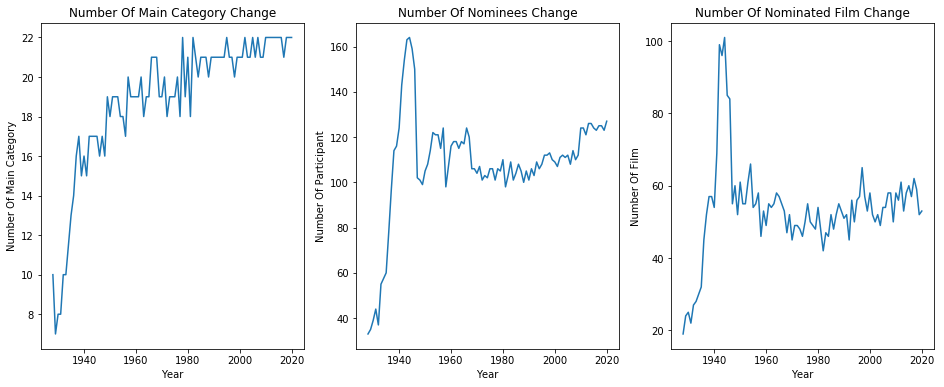

In [13]:
year_record=oscar[['year_ceremony','category1','name','film']].groupby(by='year_ceremony').nunique()
del year_record['year_ceremony']
year_record['true_winner']=oscar.loc[oscar.winner==1,['year_ceremony','winner']].groupby(by='year_ceremony').count()
year_record['false_winner']=oscar.loc[oscar.winner==0,['year_ceremony','winner']].groupby(by='year_ceremony').count()
f, axes = plt.subplots(1,3, figsize=(16,6))
year_number=year_record.index.tolist()
yCategory=year_record['category1'].tolist()
yName=year_record['name'].tolist()
yFilm=year_record['film'].tolist()
vis1 = sns.lineplot(x=year_number, y=yCategory,ax=axes[0])
vis1.set(xlabel='Year', ylabel='Number Of Main Category')
axes[0].set_title('Number Of Main Category Change')
vis2 = sns.lineplot(x=year_number, y=yName,ax=axes[1])
vis2.set(xlabel='Year', ylabel='Number Of Participant')
axes[1].set_title('Number Of Nominees Change')
vis3 = sns.lineplot(x=year_number, y=yFilm,ax=axes[2])
vis3.set(xlabel='Year', ylabel='Number Of Film')
axes[2].set_title('Number Of Nominated Film Change')
plt.show()

In [14]:
year_record['nominate']=oscar[['year_ceremony','winner']].groupby(by='year_ceremony').count()
yearDescr=round(year_record.describe(),4)
print(yearDescr)

       category1      name      film  true_winner  false_winner  nominate
count     92.000   92.0000   92.0000      92.0000       92.0000   92.0000
mean      18.913  108.6739   53.6304      25.6196       87.3696  112.9891
std        3.386   23.6551   13.1715       4.5400       22.7947   25.9829
min        7.000   33.0000   19.0000       7.0000       20.0000   35.0000
25%       18.000  103.7500   49.0000      25.0000       80.7500  106.7500
50%       20.000  109.5000   53.5000      26.0000       85.5000  112.0000
75%       21.000  120.2500   57.0000      28.0000       96.0000  124.0000
max       22.000  164.0000  101.0000      33.0000      156.0000  186.0000


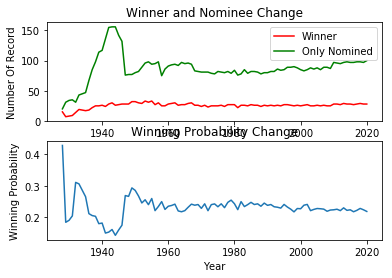

In [15]:
plt.subplot(2,1,1)
true_winner_line,false_winner_line=plt.plot(
    year_number,year_record['true_winner'].to_list(),
    year_number,year_record['false_winner'].to_list())
plt.setp(true_winner_line,color='r')
plt.setp(false_winner_line,color='g')
plt.ylabel('Number Of Record')
plt.xlabel('Year')
plt.title('Winner and Nominee Change')
plt.legend(handles = [true_winner_line,false_winner_line], labels = ['Winner', 'Only Nomined'], loc = 'best')
year_record['winning_probability']=year_record['true_winner']/year_record['nominate']
yWinning_probability=year_record['winning_probability'].to_list()
vis1 = sns.lineplot(x=year_number, y=yWinning_probability,ax=plt.subplot(2,1,2))
vis1.set(xlabel='Year', ylabel='Winning Probability')
vis1.set_title('Winning Probability Change')
plt.show()

In [16]:
All_movie=oscar[['film','winner']].groupby(by='film').sum().sort_values(by='winner',ascending=False)
All_movie['Awards']=All_movie['winner'].apply(lambda x:int(x))
del All_movie['winner']
All_movie['Nominations']=oscar[['film','winner']].groupby(by='film').count()
All_movie['Winnin_rate']=All_movie['Awards']/All_movie['Nominations']
print(All_movie.head(10))

                                               Awards  Nominations  \
film                                                                 
Titanic                                            12           16   
The Lord of the Rings: The Return of the King      11           11   
Ben-Hur                                            11           12   
West Side Story                                    10           11   
The English Patient                                 9           12   
Gigi                                                9            9   
The Last Emperor                                    9            9   
Slumdog Millionaire                                 8           10   
On the Waterfront                                   8           12   
My Fair Lady                                        8           12   

                                               Winnin_rate  
film                                                        
Titanic                              

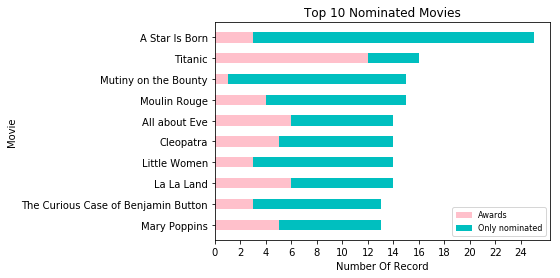

In [17]:
nominated_movie=All_movie.sort_values(by='Nominations',ascending=False).head(10)
nominated_movie['Diff']=nominated_movie['Nominations']-nominated_movie['Awards']
nominated_movie=nominated_movie.sort_values(by='Nominations')
vis1=plt.barh(nominated_movie.index.tolist(), nominated_movie['Awards'], 0.5,color = 'pink', label = 'Awards')
vis1=plt.barh(nominated_movie.index.tolist(), nominated_movie['Diff'],0.5, color = 'c', left = nominated_movie['Awards'], label = 'Only nominated')
plt.xlabel('Number Of Record')
plt.ylabel('Movie')
plt.xticks(range(0,max(nominated_movie['Nominations']),2))
plt.legend(loc='lower right',fontsize=8)
plt.title('Top 10 Nominated Movies')
plt.show()

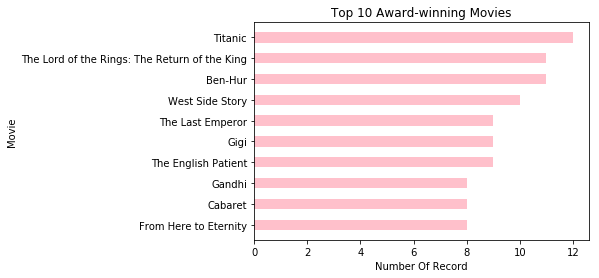

In [18]:
Award_winning_movie=All_movie.sort_values(by='Awards',ascending=False).head(10)
Award_winning_movie=Award_winning_movie.sort_values(by='Awards')
movie_name=Award_winning_movie.index.tolist()
count_award=Award_winning_movie['Awards'].to_list()
vis2= plt.barh(movie_name,count_award,height=0.5, color = 'pink')
plt.xlabel('Number Of Record')
plt.ylabel('Movie')
plt.title('Top 10 Award-winning Movies')
plt.xticks(range(0,max(Award_winning_movie['Awards'])+2,2))
plt.show()

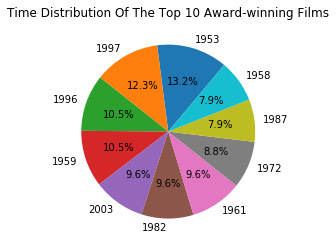

In [19]:
topTenMovieInfo=oscar.loc[oscar['film'].isin(movie_name),['year_ceremony','year_film','name','film','category1']]
plt.pie(topTenMovieInfo.year_film.value_counts(),labels=topTenMovieInfo.year_film.value_counts().index,
        autopct='%1.1f%%',shadow=False,startangle=50)
plt.title('Time Distribution Of The Top 10 Award-winning Films')
plt.show()

In [20]:
nominated_person=oscar['one_of_the_names'].value_counts()
nominated_person=pd.DataFrame(nominated_person)
nominated_person['Awards']=oscar.loc[oscar.winner==1,['one_of_the_names','winner']].groupby(by='one_of_the_names').count()
print(nominated_person.head(10))

                                             one_of_the_names  Awards
Metro-Goldwyn-Mayer                                        64    12.0
Walt Disney                                                61    24.0
Warner Bros.                                               44     8.0
John Williams                                              44     4.0
Alfred Newman                                              41     9.0
France                                                     37     9.0
Edith Head                                                 34     8.0
  Cedric Gibbons                                           28     8.0
Italy                                                      27    10.0
Metro-Goldwyn-Mayer Studio Sound Department                27     8.0


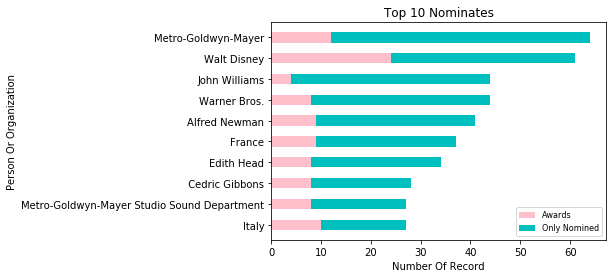

In [21]:
topTenPerson=nominated_person.head(10)
topTenPerson=pd.DataFrame(topTenPerson)
topTenPerson=topTenPerson.sort_values(by='one_of_the_names')
topTenPerson=topTenPerson.rename(columns={'one_of_the_names':'Total nominations'})
topTenPerson['Awards']=oscar.loc[oscar.winner==1,['one_of_the_names','winner']].groupby(by='one_of_the_names').count()
topTenPerson['Only Nomined']=topTenPerson['Total nominations']-topTenPerson['Awards']
vis1= plt.barh(topTenPerson.index.tolist(),topTenPerson['Awards'].to_list(),height=0.5, color = 'pink',label='Awards')
vis1= plt.barh(topTenPerson.index.tolist(),topTenPerson['Only Nomined'].to_list(),height=0.5, left=topTenPerson['Awards'].to_list(),color = 'c',label='Only Nomined')
plt.xlabel('Number Of Record')
plt.ylabel('Person Or Organization')
plt.title('Top 10 Nominates')
plt.legend(loc='lower right',fontsize=8)
plt.show()

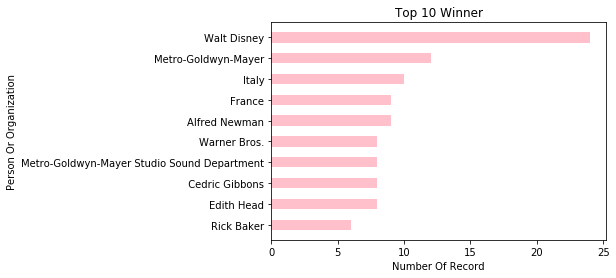

In [22]:
topTenAwardsP=nominated_person.sort_values(by='Awards',ascending=False).head(10)
topTenAwardsP=topTenAwardsP.sort_values(by='Awards')
person_name=topTenAwardsP.index.tolist()
count_award=topTenAwardsP['Awards'].to_list()
vis2= plt.barh(person_name,count_award,height=0.5, color = 'pink')
plt.xlabel('Number Of Record')
plt.ylabel('Person Or Organization')
plt.title('Top 10 Winner')
plt.show()